In [1]:
import geopandas as gpd

import geograpy
from geograpy import extraction
from geograpy import places
import re
from geograpy.labels import Labels

import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.corpus import ieer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

import geopy

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azg526\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from geopy.geocoders import Nominatim
import time
from tabulate import tabulate

In [3]:
import pandas as pd

In [4]:
from shapely.geometry import Point

In [5]:
import contextily as ctx

In [6]:
import matplotlib.pyplot as plt #to make sure there are no errors when plotting a graph

In [7]:
import plotly.express as px

Geoparsing Entities 

In [8]:
#reading text file
text = open('../corridos\el_corrido_greg_cortez.txt', encoding="utf-8").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)
 # Break text into sentences
sentences = nltk.sent_tokenize(text)

0 En el condado El Carmen miren lo que ha sucedido, murió el Cherife Mayor, quedando Román herido.
1 Se anduvieron informando como media hora después supieropn que el malhechor era Gregorio Cortez.
2 Ya insortaron a Cortez por toditito el estado, que vivo o muerto se aprehenda proque a various ha matado.
3 Decía Gregorio Cortez con su pistola en la mano: No siento haberlo matado, lo que siento es a mi hermano.
4 Decía Gregorio Cortez con su almu my encendid: No siento haberlo matado, la defensa es permitida.
5 Venían los american mas blancos que una amapola, de miedo que le tenían a Cortez con su pistola.
6 Decían los americanos, decían con timidez: Vamos a seguir la huella que el malhechor es Cortez.
7 Soltaron los perros juanes pa'que siguieran la huella, pero alcanzar a Cortez.
8 Tiró con rumbo a Gonzales sin ninguna timidez: Síganme, rinches cobardes, yo soy Gregorio Cortez.
9 Se fue de Belmont al rancho, lo alcanzaron a rodear, poquitos más de trescientos, y allí les brincó el cor

In [9]:
LOC=extraction.Extractor(text=text)
LOC.find_geoEntities()

print(LOC.places)

['En', 'Cortez', 'Cortez', 'Cortez', 'Gonzales', 'Belmont', 'Laredo', 'Cortez']


In [10]:
from geograpy import places

pc = places.PlaceContext(LOC.places)

pc.set_countries()
print (pc.countries) #['United States']

pc.set_regions()
print(pc.regions) #['Texas'])

pc.set_cities()
print(pc.cities) #['Brownsville'])

print(pc.address_strings) #['Brownsville','Texas, United States'])

[]
[]
['Laredo', 'Belmont', 'Gonzales', 'Cortez', 'En']
[]


Laredo, Tejas

In [11]:
geolocator = Nominatim(user_agent="CorridosMap")

In [12]:
laredo=pc.cities[0]
print (laredo)

Laredo


need to know the country code https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2#Current_codes

In [13]:
laredo_info = geolocator.geocode(laredo)
laredo_lat = (laredo_info.latitude) 
laredo_long= (laredo_info.longitude)
print(laredo_info)
print(laredo_long,',', laredo_lat)

Laredo, Webb County, Texas, United States
-99.497352 , 27.5236998


Belmont, Tejas/Texas

In [14]:
belmont='Belmont, Gonzales County,Texas'
#belmont=pc.cities[1]
belmont_info=geolocator.geocode(belmont)
belmont_lat = (belmont_info.latitude)
belmont_long= (belmont_info.longitude)
print(belmont_info)
print(belmont_long,',', belmont_lat)

Belmont, Gonzales County, Texas, 78122, United States
-97.6875125 , 29.5241066


Gonzales, Tejas

In [15]:

#gonzales='Gonzales,Texas'
gonzales=pc.cities[2]
gonzales_info=geolocator.geocode(gonzales)
gonzales_lat = (gonzales_info.latitude) 
gonzales_long =(gonzales_info.longitude)
#gonzales=gonzales_info, gonzales_coordinates
print(gonzales_lat, ',', gonzales_long)
print(gonzales_info)

29.4436555 , -97.5108636
Gonzales County, Texas, United States


dataframe

In [16]:
greg = pd.DataFrame({'Place/City':[gonzales, 'Belmont', laredo], 'State': ['Texas', 'Texas', 'Texas'], 
'Latitude':[gonzales_lat, belmont_lat, laredo_lat], 'Longitude': [gonzales_long, belmont_long, laredo_long]})

In [17]:
greg.head()

,Place/City,State,Latitude,Longitude
0,Gonzales,Texas,29.443655,-97.510864
1,Belmont,Texas,29.524107,-97.687512
2,Laredo,Texas,27.523700,-99.497352


Setting Geometry- https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.set_geometry.html#

Creating a GeoDataFrame from a DataFrame with coordinates https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

In [18]:
greg_gpd = gpd.GeoDataFrame(
    greg, geometry=gpd.points_from_xy(greg.Longitude, greg.Latitude),  crs="EPSG:4326")

c:\Users\azg526\Anaconda3\envs\map\lib\site-packages\geopandas\array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


figure out later shapely 2.0 

  Place/City  State   Latitude  Longitude                    geometry
0   Gonzales  Texas  29.443655 -97.510864  POINT (-97.51086 29.44366)
1    Belmont  Texas  29.524107 -97.687512  POINT (-97.68751 29.52411)
2     Laredo  Texas  27.523700 -99.497352  POINT (-99.49735 27.52370)


<AxesSubplot:>

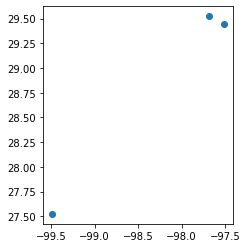

In [19]:
print(greg_gpd.head())
greg_gpd.plot()

In [20]:
#greg_gpd_basemap, greg_gpd_extent = ctx.bounds2img(*greg_gpd.total_bounds, zoom=10,   
                                            #source=ctx.providers.OpenStreetMap.Mapnik )

In [21]:
fig = px.line_mapbox(greg_gpd, lat="Latitude", lon="Longitude", color="State", height=800, 
title='EL corrido de Gregorio Cortez', hover_name='Place/City')

fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=7, mapbox_center_lat = 28,
    margin={"r":0,"t":0,"l":0,"b":0})

fig.show()